In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from PIL import Image

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


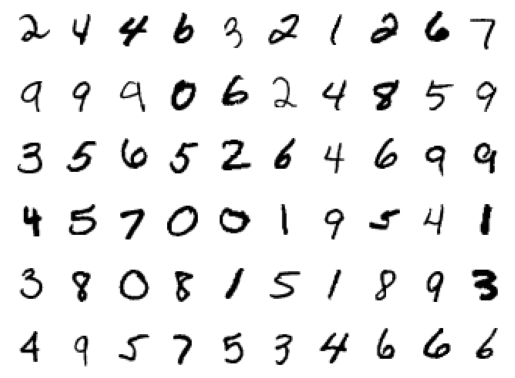

In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.1249e-04, -1.1249e-04, -1.1249e-04,  ..., -1.1249e-04,
         -1.1249e-04, -1.1249e-04],
        [ 1.2077e-03,  1.2077e-03,  1.2077e-03,  ...,  1.2077e-03,
          1.2077e-03,  1.2077e-03],
        [ 1.2578e-03,  1.2578e-03,  1.2578e-03,  ...,  1.2578e-03,
          1.2578e-03,  1.2578e-03],
        ...,
        [ 2.1440e-05,  2.1440e-05,  2.1440e-05,  ...,  2.1440e-05,
          2.1440e-05,  2.1440e-05],
        [ 1.4688e-03,  1.4688e-03,  1.4688e-03,  ...,  1.4688e-03,
          1.4688e-03,  1.4688e-03],
        [-4.9290e-05, -4.9290e-05, -4.9290e-05,  ..., -4.9290e-05,
         -4.9290e-05, -4.9290e-05]])


In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.634349373540581
Epoch 1 - Training loss: 0.27720143663476526
Epoch 2 - Training loss: 0.2190960874792927
Epoch 3 - Training loss: 0.17865153159231328
Epoch 4 - Training loss: 0.14977088801538957
Epoch 5 - Training loss: 0.12938115131685823
Epoch 6 - Training loss: 0.11207383305632643
Epoch 7 - Training loss: 0.09918411065742913
Epoch 8 - Training loss: 0.08904878388909596
Epoch 9 - Training loss: 0.08058842562033788
Epoch 10 - Training loss: 0.07296036073524974
Epoch 11 - Training loss: 0.06775650738337353
Epoch 12 - Training loss: 0.060451353990486754
Epoch 13 - Training loss: 0.05552544938137274
Epoch 14 - Training loss: 0.05223581474597083

Training Time (in minutes) = 4.670866060256958


Predicted Digit = 2


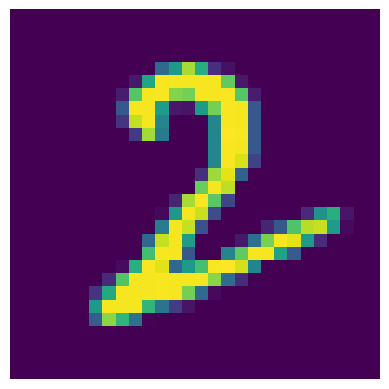

In [15]:
images, labels = next(iter(valloader))

img = images[3].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
plt.axis('off')
plt.imshow(img.resize_(1, 28, 28).numpy().squeeze())
print("Predicted Digit =", probab.index(max(probab)))


In [16]:
torch.save(model, './HwDigits_recognition_model.pt')